You have answered 1 questions right out of 48


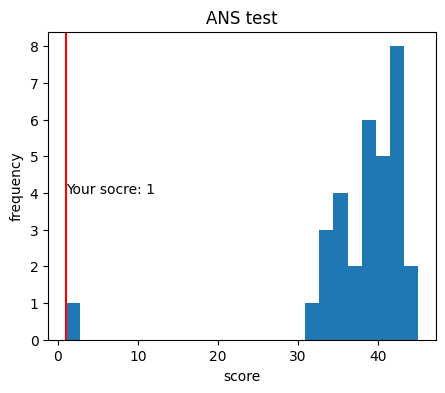

In [5]:
from IPython.display import display, Image, clear_output, HTML
import time
import random
import ipywidgets as widgets
from IPython.display import display, clear_output, HTML
from jupyter_ui_poll import ui_events
import pandas as pd
import requests
from bs4 import BeautifulSoup
import json
import matplotlib.pyplot as plt
import numpy as np

#defining the function sending to google form
def send_to_google_form(data_dict, form_url):
    
    form_id = form_url[34:90]
    view_form_url = f'https://docs.google.com/forms/d/e/{form_id}/viewform'
    post_form_url = f'https://docs.google.com/forms/d/e/{form_id}/formResponse'

    page = requests.get(view_form_url)
    content = BeautifulSoup(page.content, "html.parser").find('script', type='text/javascript')
    content = content.text[27:-1]
    result = json.loads(content)[1][1]
    form_dict = {}
    
    loaded_all = True
    for item in result:
        if item[1] not in data_dict:
            print(f"Form item {item[1]} not found. Data not uploaded.")
            loaded_all = False
            return False
        form_dict[f'entry.{item[4][0][0]}'] = data_dict[item[1]]
    
    post_result = requests.post(post_form_url, data=form_dict)
    return post_result.ok
  
#button settings
event_info = {
    'type': '',
    'description': '',
    'time': -1
}

def wait_for_event(timeout=-1, interval=0.001, max_rate=20, allow_interupt=True):    
    start_wait = time.time()

    # set event info to be empty
    # as this is dict we can change entries
    # directly without using
    # the global keyword
    event_info['type'] = ""
    event_info['description'] = ""
    event_info['time'] = -1

    n_proc = int(max_rate*interval)+1
    
    with ui_events() as ui_poll:
        keep_looping = True
        while keep_looping==True:
            # process UI events
            ui_poll(n_proc)

            # end loop if we have waited more than the timeout period
            if (timeout != -1) and (time.time() > start_wait + timeout):
                keep_looping = False
                
            # end loop if event has occured
            if allow_interupt==True and event_info['description']!="":
                keep_looping = False
                
            # add pause before looping
            # to check events again
            time.sleep(interval)
    
    # return event description after wait ends
    # will be set to empty string '' if no event occured
    return event_info

# this function lets buttons 
# register events when clicked
def register_event(btn):
    # display button description in output area
    event_info['type'] = "click"
    event_info['description'] = btn.description
    event_info['time'] = time.time()
    return



#to randomly generte the ANS dots pictures, I used the matplot
#x_number for x-axis, y_number for y_axis, all in the circle whose centre is (10,10), radius 8
#number of dots for the number of dots generating in the left, and change the amount from change_in_number list in the right
x_number = [5,6,7,8,9,10,11,12,13,14,15]
y_number = [5,6,7,8,9,10,11,12,13,14,15]
number_of_dots = [50,55,60,65,70,75,80]
change_in_number = [-25,-20,-15,-12,-10,-8,8,10,12,15,20]

#to define a function generating one picture consists of left and right circle with dots
#random shuffle the lists above to append them into the x_axis and y_axis lists
def show_one_picture():
    x_axis_green =[]
    y_axis_green =[]
    x_axis_red =[]
    y_axis_red =[]
    
    random.shuffle(number_of_dots)
    random.shuffle(change_in_number)
    for i in range (number_of_dots[0]):
        random.shuffle(x_number)
        random.shuffle(y_number)
        x_axis_green.append(x_number[0])
        y_axis_green.append(y_number[0])

    for i in range (number_of_dots[0] + change_in_number[0]):
        random.shuffle(x_number)
        random.shuffle(y_number)
        x_axis_red.append(x_number[0])
        y_axis_red.append(y_number[0])
        
    axes1 = plt.subplot(1, 2, 1)  # row 1, column 2, count 1
    #draw circle
    Drawing_uncolored_circle = plt.Circle( (10, 10),8 ,fill = False )
    axes1.add_artist( Drawing_uncolored_circle )
    #plot green dots, make the axis dissapear, and show the range 0 to 20 for both x and y axises
    plt.plot(x_axis_green, y_axis_green, 'go')
    plt. axis( 'off' )
    plt.xlim(0, 20)
    plt.ylim(0, 20)

    # using subplot function and creating plot two
    axes2 = plt.subplot(1, 2, 2) # row 1, column 2, count 2
    #draw circle
    Drawing_uncolored_circle = plt.Circle( (10, 10),8 ,fill = False )
    axes2.add_artist( Drawing_uncolored_circle )
    #plot red dots, make the axis dissapear, and show the range 0 to 20 for both x and y axises
    plt.plot(x_axis_red, y_axis_red, 'ro')
    plt. axis( 'off' )
    plt.xlim(0, 20)
    plt.ylim(0, 20)
     
    # show plot
    plt.show()

def ANS_test():  
    #ask for consent
    data_consent_info = """
    DATA CONSENT INFORMATION:
    
    Please read:
    we wish to record your response data
    to an anonymised public data repository.
    Your data will be used for educational teaching purposes
    practising data analysis and visualisation.
    Please type yes in the box below if you consent to the upload.
    
    """

    print(data_consent_info)
    
    consent = input(">")
    if consent == "Yes" or "YES" or "yes":
        print("""
        
        Thank you for your participation.
        Please contact philip.lewis@ucl.ac.uk
        If you have any questions or concerns
        regarding the stored results.
        
        """)
        time.sleep(5)
    else:
        raise(Exception("User did not consent to continue test."))

    clear_output(wait=False)

    #ask for id
    id_instructions = """

    Enter your anonymised ID
    To generate an anonymous 4-letter unique user identifier please enter:
    - two first letters (in capital) of your favoutite fruit
    - two letters based on the initials (first and last name) of a favourite actor / actress

    e.g. if your favoutite fruit is orange and favourite actor is Adam Sendler
    then your unique identifer would be ORAS
    
    """
    
    print(id_instructions)
    your_id = ""
    your_id = input("Enter here:")
    
    #ask their age
    print("What is your age?")
    your_age = input(">")
    
    #ask their sex, by making buttons of male and female
    print("Are you male or female?")
    btn10 = widgets.Button(description="Male")
    btn20 = widgets.Button(description="Female")
    btn10.on_click(register_event) 
    btn20.on_click(register_event) 
    panel = widgets.HBox([btn10, btn20])
    display(panel)
    result = wait_for_event(timeout=15)
    clear_output()
    your_sex = result['description']

    #instructions for the ANS test
    print ("You will be first shown a picture like this for 0.75 seconds")
    show_one_picture()
    time.sleep(2)
    clear_output(wait=False)
    print ("Then you have to answer which side has more dots")
    time.sleep(3)
    print ("You will be given 3 seconds to answer")
    time.sleep(2)
    print ("the test starts now")
    time.sleep(2)
    clear_output(wait=False)
    
    #set correct_number to store the numnber of questions that they answered right
    correct_number = 0
    
    #conduct the test by repeating show_one_picture
    for r in range (1):
        show_one_picture()
        time.sleep(0.75)
        clear_output()

        #make the buttos left and right to ask them which side had more dots
        myhtml1 = HTML("<h1>Which side had more dots?</h1>")
        display(myhtml1)
        myhtml2 = HTML("<h2>You have 3 seconds to answer</h2>")
        display(myhtml2)
        btn1 = widgets.Button(description="Left")
        btn2 = widgets.Button(description="Right")
        btn1.on_click(register_event) 
        btn2.on_click(register_event)
        panel = widgets.HBox([btn1, btn2])
        display(panel)

        result = wait_for_event(timeout=3)
        clear_output()

        #if change_in_number smaller than 0, it means that right is smaller than left, so the answer will be left, vice versa
        if change_in_number[0] < 0:
            ans = "Left"
        elif change_in_number[0] > 0:
            ans = "Right"

        #if the answer is correct, add 1 to correct_number
        #if it took more than 3 seconds, timeout
        #if it's wrong, incorrect
        if result['description']== ans:
            correct_number = correct_number + 1
            description = "Correct!"
            
        elif result['description'] == "":
            description = "Time out"

        else:
            description = "Incorrect!"

        print (description)
        time.sleep(0.75)
        clear_output()
        time.sleep(1.5)

    #tell the participants their results
    print(f"You have answered {correct_number} questions right out of 48")

    #tell the participants where they are in the histogram of data
    score_ans = [38,41,38,43,44,42,36,42,42,42,45,34,34,31,41,38,39,37,39,33,42,43,39,41,42,41,37,36,41,36,36]
    score_ans.append(correct_number)
    plt.figure(figsize=(5,4))
    plt.hist(score_ans, bins=25)
    plt.title("ANS test")
    plt.xlabel("score")
    plt.ylabel("frequency")
    plt.axvline(x=correct_number , color ='red', linestyle='-', label='Your score')
    plt.text(correct_number,4,f'Your socre: {correct_number}')
    plt.show
    
    #send data to google form
    data_dict = {'id':your_id,
                 'age':your_age,
                 'sex': your_sex,
                 'score': correct_number}
    form_url = 'https://docs.google.com/forms/d/e/1FAIpQLSd-L-aOWf3KoXmfQtb85zuciMzADcAMaM5EYUrgQY2yePc__w/viewform?vc=0&c=0&w=1&flr=0'
    send_to_google_form(data_dict, form_url)

ANS_test()